<a href="https://colab.research.google.com/github/Sarvagya4/Licenseplate_reader/blob/main/LP_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (14.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import numpy as np
import imutils
import pytesseract
from matplotlib import pyplot as plt

In [4]:
def show_img(img):
  """
  Display the given image using matplotlib.

  Args: img (numpy.ndarray): The image to be displayed.

  Returns: None
  """
  fig = plt.gcf()
  fig.set_size_inches(16, 8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [5]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Src_image.png')
(H, W) = img.shape[:2]
print(H, W)

102 380


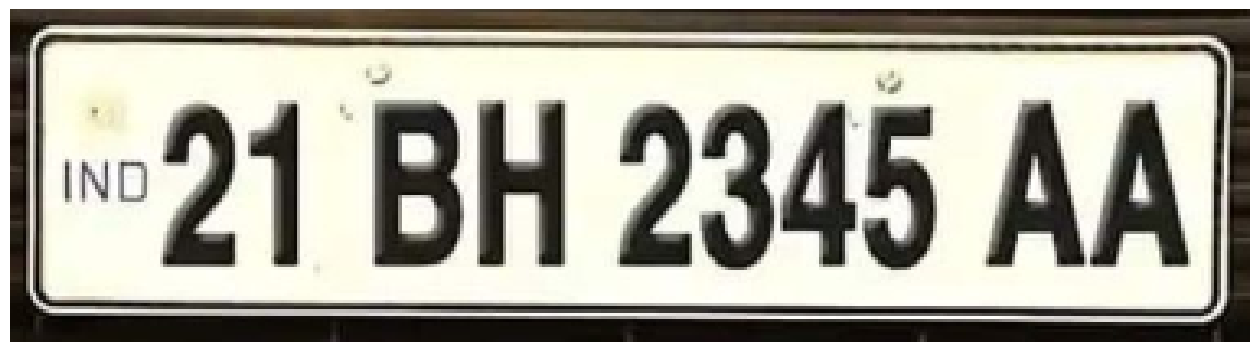

In [6]:
show_img(img)

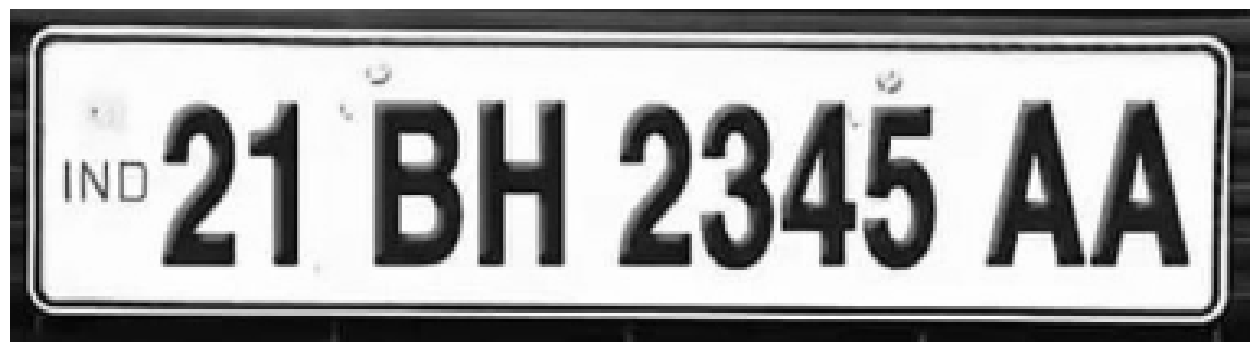

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(gray)

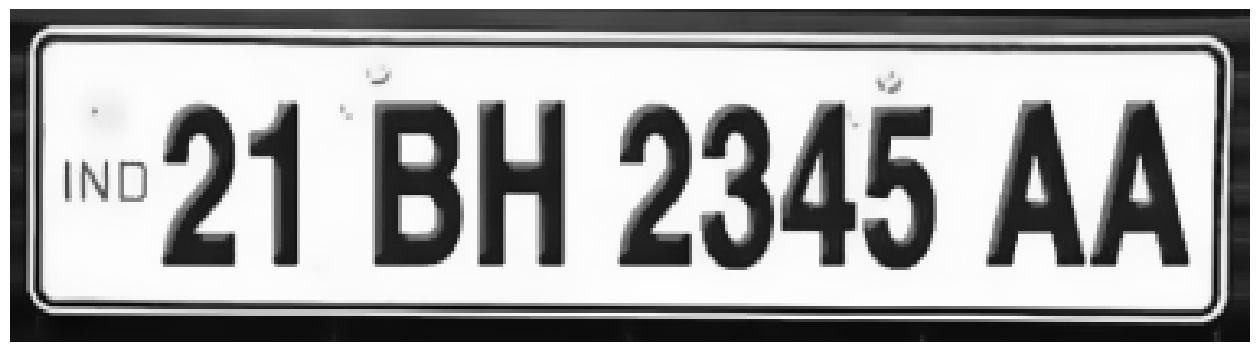

In [8]:
blur = cv2.bilateralFilter(gray, 11, 17, 17)
show_img(blur)

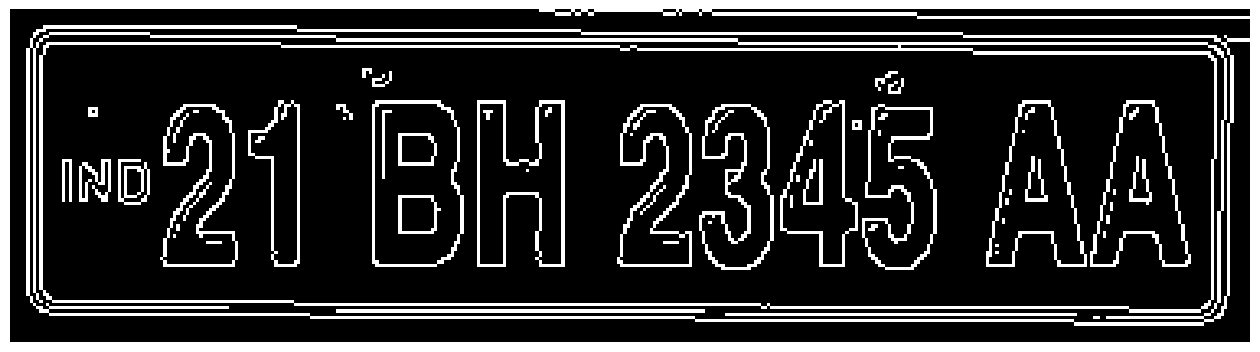

In [9]:
edged = cv2.Canny(blur, 30, 200)
show_img(edged)

In [10]:
conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]

In [11]:
conts

[array([[[ 10,   5]],
 
        [[  9,   6]],
 
        [[  8,   6]],
 
        [[  7,   7]],
 
        [[  7,   8]],
 
        [[  6,   9]],
 
        [[  6,  11]],
 
        [[  5,  12]],
 
        [[  5,  87]],
 
        [[  6,  88]],
 
        [[  6,  89]],
 
        [[  9,  92]],
 
        [[ 11,  92]],
 
        [[ 12,  93]],
 
        [[ 91,  93]],
 
        [[ 92,  94]],
 
        [[209,  94]],
 
        [[210,  95]],
 
        [[325,  95]],
 
        [[326,  96]],
 
        [[365,  96]],
 
        [[366,  95]],
 
        [[368,  95]],
 
        [[369,  94]],
 
        [[370,  94]],
 
        [[371,  93]],
 
        [[371,  92]],
 
        [[372,  91]],
 
        [[372,  88]],
 
        [[373,  87]],
 
        [[373,  35]],
 
        [[374,  34]],
 
        [[374,  14]],
 
        [[373,  13]],
 
        [[373,  12]],
 
        [[372,  11]],
 
        [[372,  10]],
 
        [[373,   9]],
 
        [[379,   9]],
 
        [[373,   9]],
 
        [[372,   8]],
 
        [[373,  

In [12]:
# location = None
# for c in conts:
#     peri = cv2.arcLength(c, True)
#     aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
#     if cv2.isContourConvex(aprox):
#       if len(aprox) == 4:
#           location = aprox
#           break

In [13]:
# def find_best_contour(contours, min_area=1000, max_area=100000):
#     potential_locations = []
#     for c in contours:
#         area = cv2.contourArea(c)
#         if min_area < area < max_area:
#             peri = cv2.arcLength(c, True)
#             for epsilon in [0.01, 0.02, 0.03, 0.04, 0.05]:
#                 aprox = cv2.approxPolyDP(c, epsilon * peri, True)
#                 if cv2.isContourConvex(aprox) and 3 <= len(aprox) <= 5:
#                     potential_locations.append((aprox, area, len(aprox)))

#     if potential_locations:
#         # Sort by area (descending) and then by closeness to 4 sides
#         best_location = sorted(potential_locations, key=lambda x: (-x[1], abs(4-x[2])))[0][0]
#         return best_location
#     return None

# # Usage
# sorted_contours = sorted(conts, key=cv2.contourArea, reverse=True)
# location = find_best_contour(sorted_contours[:20])  # Check top 20 largest contours

# if location is None:
#     print("No suitable contour found. Using largest contour as fallback.")
#     location = max(conts, key=cv2.contourArea) if conts else None

# if location is not None:
#     img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
#     show_img(mask)
# else:
#     print("Error: No contours found at all.")

NameError: name 'mask' is not defined

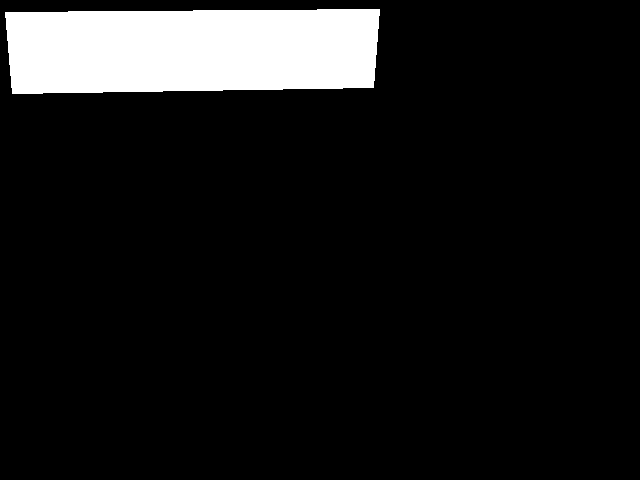

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def find_best_contour(contours, min_area=1000, max_area=100000):
    potential_locations = []
    for c in contours:
        area = cv2.contourArea(c)
        if min_area < area < max_area:
            peri = cv2.arcLength(c, True)
            for epsilon in [0.01, 0.02, 0.03, 0.04, 0.05]:
                aprox = cv2.approxPolyDP(c, epsilon * peri, True)
                if cv2.isContourConvex(aprox) and 3 <= len(aprox) <= 5:
                    potential_locations.append((aprox, area, len(aprox)))

    if potential_locations:
        # Sort by area (descending) and then by closeness to 4 sides
        best_location = sorted(potential_locations, key=lambda x: (-x[1], abs(4-x[2])))[0][0]
        return best_location
    return None

# Example of usage
sorted_contours = sorted(conts, key=cv2.contourArea, reverse=True)
location = find_best_contour(sorted_contours[:20])  # Check top 20 largest contours

# Initialize mask (assuming the image size is known, e.g., 640x480)
height, width = 480, 640  # Example dimensions, replace with actual size
mask = np.zeros((height, width), dtype=np.uint8)

if location is None:
    print("No suitable contour found. Using largest contour as fallback.")
    location = max(conts, key=cv2.contourArea) if conts else None

if location is not None:
    img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
    cv2_imshow(mask)  # Use cv2_imshow instead of cv2.imshow
else:
    print("Error: No contours found at all.")


In [17]:
location

array([[[  5,  12]],

       [[ 12,  93]],

       [[373,  87]],

       [[379,   9]]], dtype=int32)

In [18]:
mask = np.zeros(gray.shape, np.uint8)

In [19]:
mask.shape

(102, 380)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
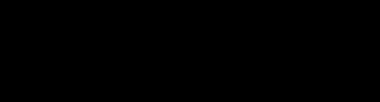

In [20]:
mask

In [21]:
print(mask.shape, mask.dtype)

(102, 380) uint8


In [22]:
print(location)

[[[  5  12]]

 [[ 12  93]]

 [[373  87]]

 [[379   9]]]


In [23]:
print(type(location), location.shape if hasattr(location, 'shape') else 'No shape')

<class 'numpy.ndarray'> (4, 1, 2)


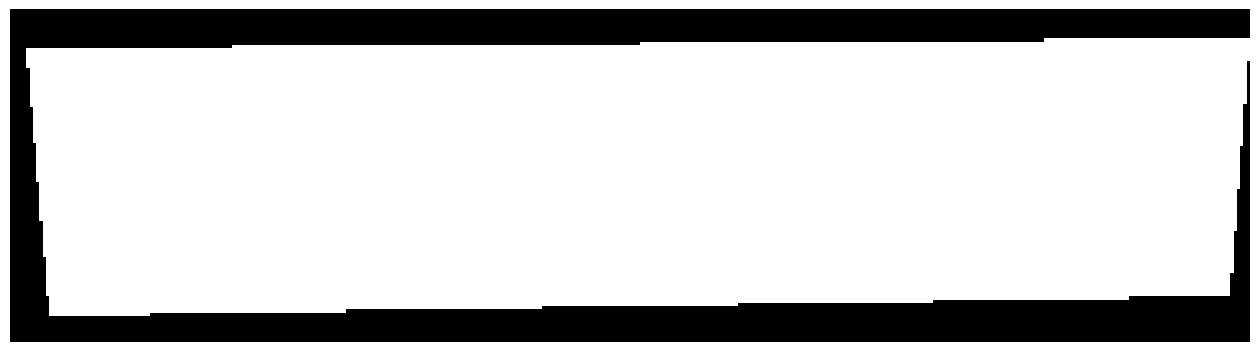

In [24]:
if location is not None:
    img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
    show_img(mask)
else:
    print("Error: location is None. Cannot draw contours.")
    # Add any additional error handling or debugging here

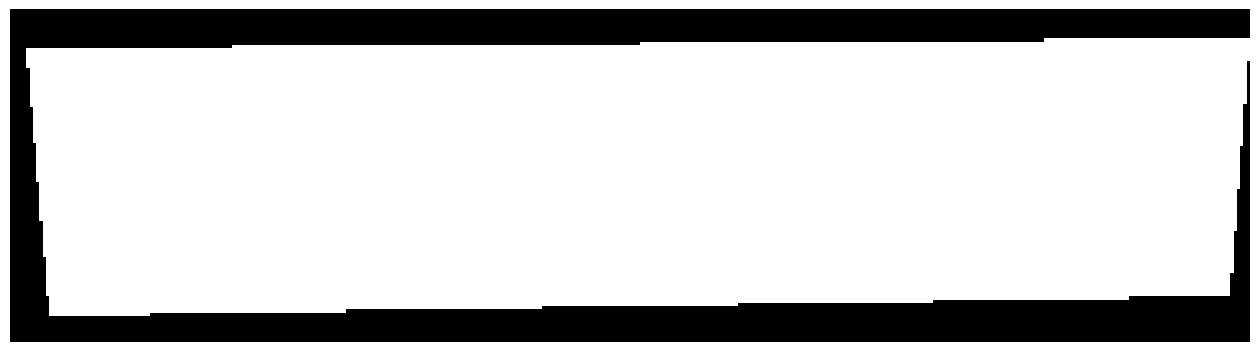

In [25]:
try:
  img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
  show_img(mask)
except Exception as e:
  print("Error drawing contours:", e)

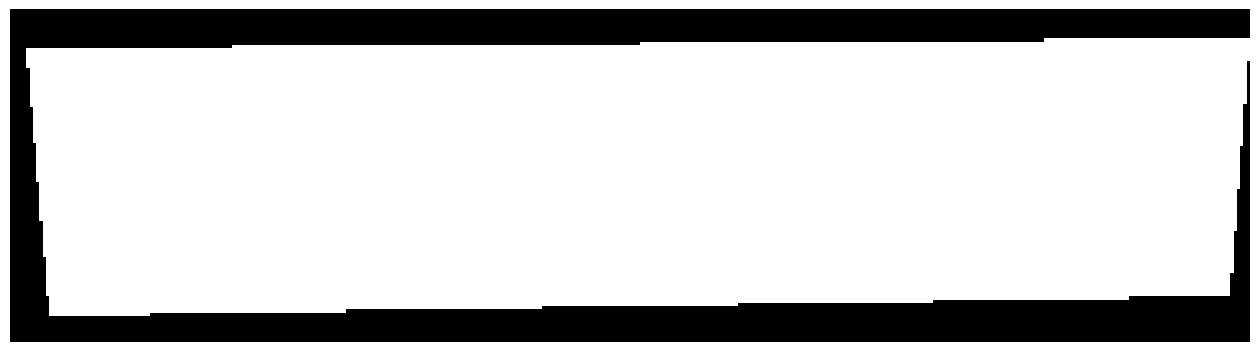

In [26]:
img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
show_img(mask)

In [27]:
img_plate = cv2.bitwise_and(img, img, mask=mask)

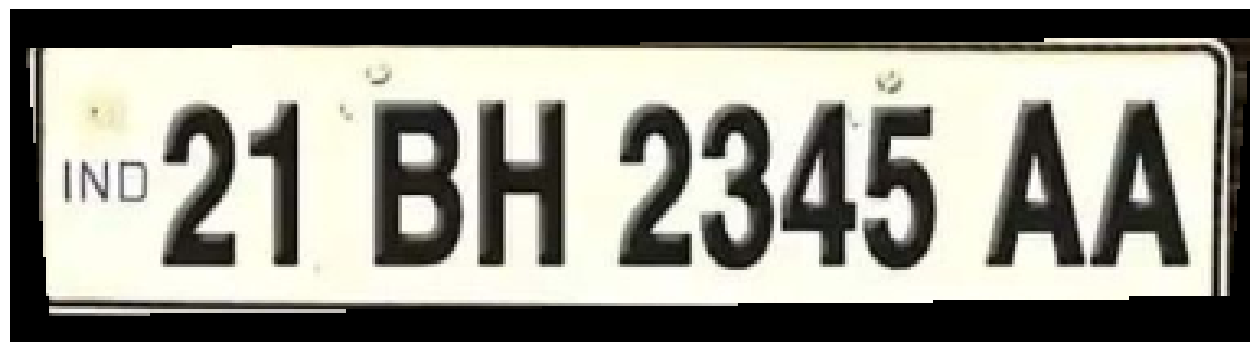

In [28]:
show_img(img_plate)

In [29]:
(y, x) = np.where(mask==255)
(beginX, beginY) = (np.min(x), np.min(y))
(endX, endY) = (np.max(x), np.max(y))

In [30]:
beginX, beginY, endX, endY

(5, 9, 379, 93)

In [31]:
plate = gray[beginY:endY, beginX:endX]

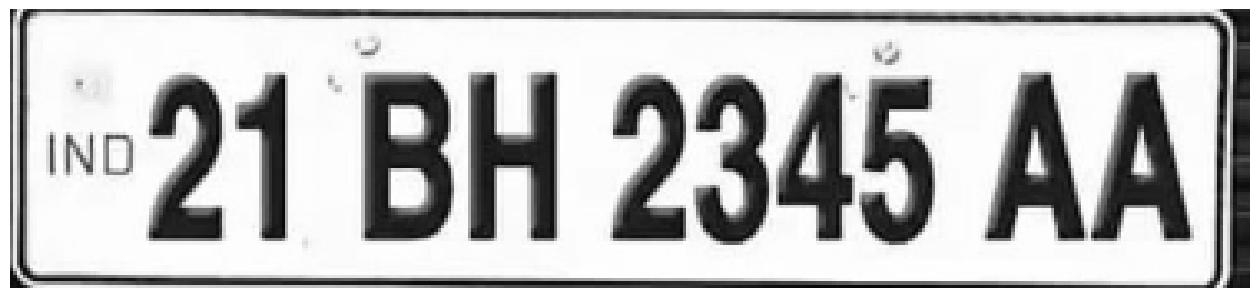

In [32]:
show_img(plate)

In [33]:
config_tesseract = "--tessdata-dir tessdata --psm 6"

In [34]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [35]:
text = pytesseract.image_to_string(plate, lang="por", config=config_tesseract)
print(text)

|-21 BH 2345 AA|



In [36]:
text

'|-21 BH 2345 AA|\n\x0c'

In [37]:
text = "".join(character for character in text if character.isalnum())
text

'21BH2345AA'

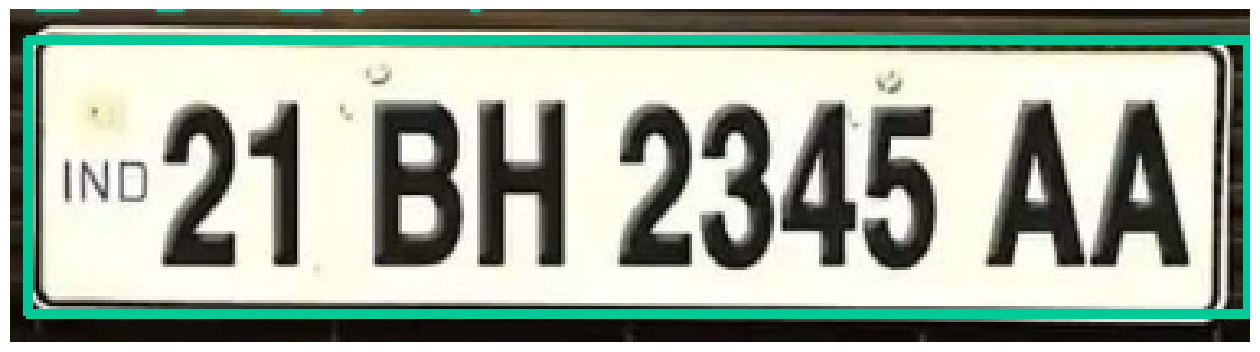

In [38]:
img_final = cv2.putText(img, text, (beginX, beginY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (150,200,0), 2, lineType=cv2.LINE_AA)
img_final = cv2.rectangle(img, (beginX, beginY), (endX, endY), (150, 200, 0), 2)
show_img(img_final)

In [39]:
def detect_plate(file_img):
  """
  Detects a potential license plate in an image and returns the original image,
  cropped license plate region (if found), and its bounding box coordinates.

  Args : file_img (str): Path to the image file.

  Returns :
        tuple: A tuple containing the following elements:
            - original_img (ndarray): The original image (BGR format).
            - plate (ndarray): The grayscale cropped license plate region,
                               or None if no plate is detected.
            - beginX (int): The x-coordinate of the top-left corner of the bounding box.
            - beginY (int): The y-coordinate of the top-left corner of the bounding box.
            - endX (int): The x-coordinate of the bottom-right corner of the bounding box.
            - endY (int): The y-coordinate of the bottom-right corner of the bounding box.

  Raises:
        ValueError: If the image file cannot be read.
  """
  img = cv2.imread(file_img)
  (H, W) = img.shape[:2]
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.bilateralFilter(gray, 11, 17, 17)
  edged = cv2.Canny(blur, 30, 200)
  show_img(edged)
  conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]

  location = None
  for c in conts:
    peri = cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
    if cv2.isContourConvex(aprox):
      if len(aprox) == 4:
          location = aprox
          break

  beginX = beginY = endX = endY = None
  if location is None:
    plate = False
  else:
    mask = np.zeros(gray.shape, np.uint8)

    img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
    img_plate = cv2.bitwise_and(img, img, mask=mask)

    (y, x) = np.where(mask==255)
    (beginX, beginY) = (np.min(x), np.min(y))
    (endX, endY) = (np.max(x), np.max(y))

    plate = gray[beginY:endY, beginX:endX]
    show_img(plate)

  return img, plate, beginX, beginY, endX, endY

In [40]:
import re

def validate_plate(text):
    """
    Validates if the given text matches the format of an Indian license plate.

    Args:
    text (str): The text to validate

    Returns:
    str: 'Proper' if the format is correct, otherwise a description of the error
    """
    if not isinstance(text, str):
        return "Error: Input must be a string"

    # Remove any whitespace and convert to uppercase
    text = ''.join(text.split()).upper()

    # Define the expected format
    # Format: 2 letters, 2 numbers, 2 letters, 4 numbers
    expected_format = r'^[A-Z]{2}\d{2}[A-Z]{2}\d{4}$'

    if re.match(expected_format, text):
        return "Proper"
    else:
        # If it doesn't match, provide more specific feedback
        if len(text) != 10:
            return f"Improper: Incorrect length (expected 10, got {len(text)})"

        errors = []
        if not text[:2].isalpha():
            errors.append("First two characters should be letters")
        if not text[2:4].isdigit():
            errors.append("Characters 3-4 should be digits")
        if not text[4:6].isalpha():
            errors.append("Characters 5-6 should be letters")
        if not text[6:].isdigit():
            errors.append("Last 4 characters should be digits")

        return "Improper: " + ", ".join(errors)

# Example usage
test_plates = [
    "MH12DE1234",  # Proper
    "mh12de1234",  # Proper (after conversion to uppercase)
    "MH12DE123",   # Improper: too short
    "MH12DE12345", # Improper: too long
    "M12HDE1234",  # Improper: wrong format
    "MHABDE1234",  # Improper: digits in wrong place
    "MH12DEABCD",  # Improper: letters in wrong place
    "12MHDE1234",  # Improper: starts with digits
    "           ", # Improper: just whitespace
    ""             # Improper: empty string
]

for plate in test_plates:
    result = validate_plate(plate)
    print(f"Plate: {plate}\nResult: {result}\n")

Plate: MH12DE1234
Result: Proper

Plate: mh12de1234
Result: Proper

Plate: MH12DE123
Result: Improper: Incorrect length (expected 10, got 9)

Plate: MH12DE12345
Result: Improper: Incorrect length (expected 10, got 11)

Plate: M12HDE1234
Result: Improper: First two characters should be letters, Characters 3-4 should be digits

Plate: MHABDE1234
Result: Improper: Characters 3-4 should be digits

Plate: MH12DEABCD
Result: Improper: Last 4 characters should be digits

Plate: 12MHDE1234
Result: Improper: First two characters should be letters, Characters 3-4 should be digits

Plate:            
Result: Improper: Incorrect length (expected 10, got 0)

Plate: 
Result: Improper: Incorrect length (expected 10, got 0)



In [41]:
def ocr_plate(plate):
  config_tesseract = "--tessdata-dir tessdata --psm 6"
  text = pytesseract.image_to_string(plate, lang="por", config=config_tesseract)
  text = "".join(c for c in text if c.isalnum())
  return text

In [42]:
def recognize_plate(file_img):
  img, plate, beginX, beginY, endX, endY = detect_plate(file_img)

  if plate is False:
    print("It was not possible to detect!")
    return 0

  text = ocr_plate(plate)
  print(text)
  img = cv2.putText(img, text, (beginX, beginY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (150,255,0), 2, lineType=cv2.LINE_AA)
  img = cv2.rectangle(img, (beginX, beginY), (endX, endY), (150, 255, 0), 2)
  show_img(img)

  return img, plate

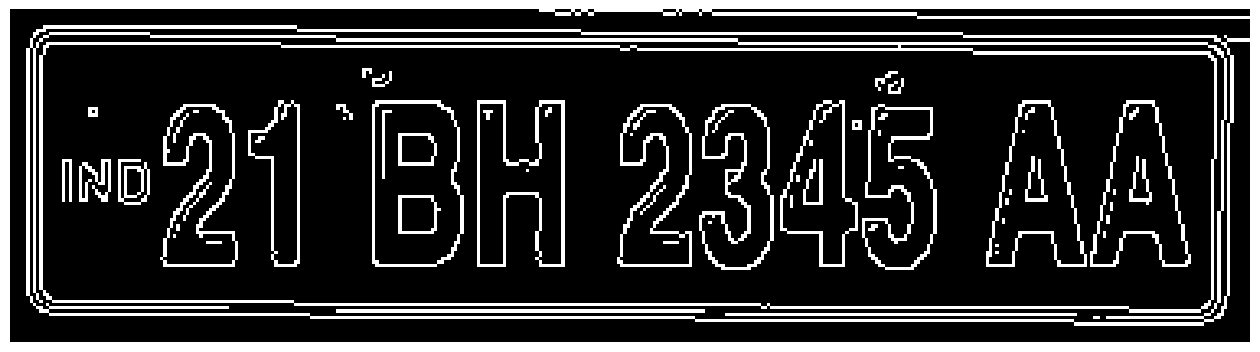

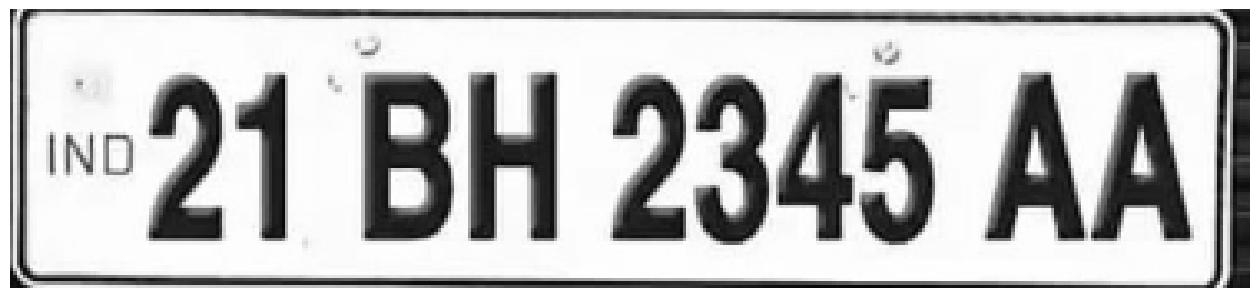

21BH2345AA


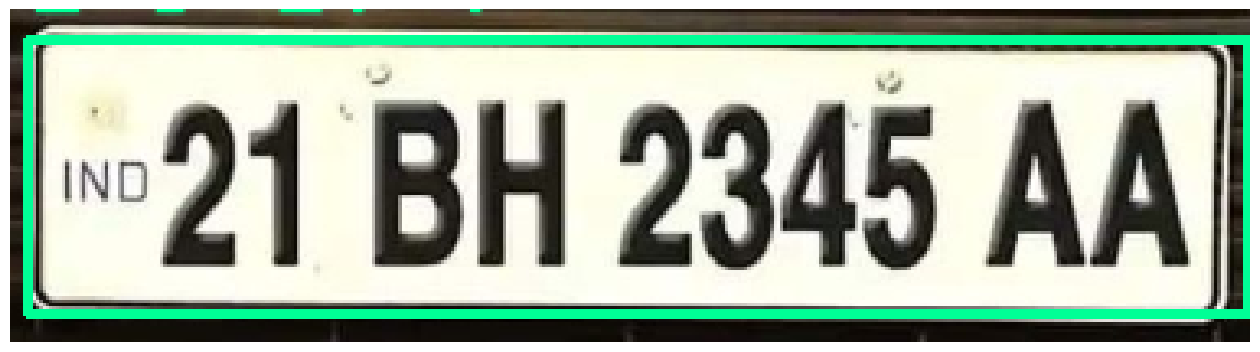

In [44]:
img, plate = recognize_plate('/content/drive/MyDrive/Colab_Notebooks/Src_image.png')